# Signalverarbeitung - Praktikum 6

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.hrz.tu-chemnitz.de%2Fjs68viga--tu-freiberg.de%2Fsignalverarbeitung-ss23/HEAD?labpath=%2FP-6%2FSigProc_Praktikum06.ipynb)

Herzlich willkommen zum sechsten Praktikum der Lehrveranstaltung "Signalverarbeitung" im Sommersemester 2023!

In diesem Praktikum geht es um das Design und die Anwendung von Filtern. Die Bibliothek [```scipy.signal```](https://docs.scipy.org/doc/scipy/reference/signal.html#filter-design) stellt hierfür eine Reihe an nützlichen Funktionen bereit. Die Wichtigsten im Rahmen dieses Praktikums sind: 
* [```signal.freqs```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqs.html#scipy.signal.freqs) 
* [```signal.freqz```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html#scipy.signal.freqz)
* [```signal.bilinear```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bilinear.html#scipy.signal.bilinear)
* [```signal.iirdesign```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirdesign.html#scipy.signal.iirdesign)
* [```signal.lfilter```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html#scipy.signal.lfilter)
* [```signal.filtfilt```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.filtfilt.html#scipy.signal.filtfilt)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy as sp
from scipy import signal
from scipy.io.wavfile import read, write   # Lesen und schreiben von *.wav Audio-dateien
from IPython.display import Audio          # Audiodateien direkt im Jupyter notebook wiedergeben.

In [2]:
sp.__version__

'1.10.1'

# Aufgabe 1

Durch die folgenden Filterkoeffizienten (Polynomdarstellung) ist ein analoger Filter definiert.

In [3]:
# Koeffizienten im Zähler:
b = np.array([8.28274956e+16, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])
# Koeffizienten im Nenner:
a = [1.00000000e+00, 4.43306370e+04, 1.12472499e+09,
     1.74835330e+13, 1.60226905e+17, 6.21199994e+20,
     1.41987737e+24, 1.98843185e+27, 1.59370885e+30]

a) Stellen Sie den Amplitudengang des Filters in einem Diagramm dar und beschreiben Sie die Eigenschaften des Filters. 

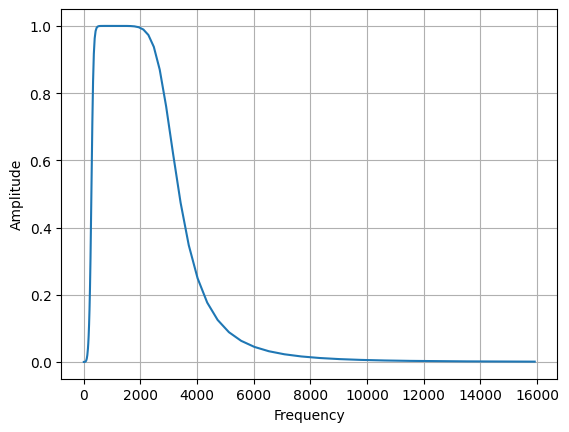

In [4]:
w_s, h_s = signal.freqs(b, a);

w_s /= 2 * np.pi;

plt.plot(w_s, np.abs(h_s));
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Lässt Frequenzen bis 2kHz durch, alles oberhalb wird weggefiltert.

b) Der oben gegebene analoge Filter soll auf das Audiosignal des Schlagzeugs aus Praktikum 3 ([link](https://gitlab.hrz.tu-chemnitz.de/js68viga--tu-freiberg.de/signalverarbeitung-ss23/-/blob/master/P-3/drums.wav)) angewendet werden. Überführen Sie hierfür zunächst mittels Bilineartransformation den analogen Filter in einen digitalen Filter. Vergleichen Sie den Amplitudengang des digitalen und des analogen Filters. Und wenden Sie schließlich den Filter auf das Ausdiosignal an.

In [5]:
# Schlagzeug
fs, drums = read("drums.wav")
drums = drums[:,0]
print("Samplerate:", fs, "Hz")
print("dtype: ", drums.dtype)
Audio(drums, rate=fs)

Samplerate: 48000 Hz
dtype:  int32


/tmp/ipykernel_8074/3009964790.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, drums = read("drums.wav")


In [6]:
b_dig, a_dig = signal.bilinear(b, a, fs/2);

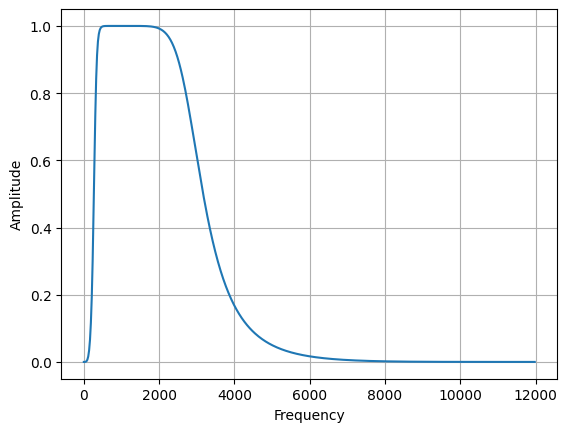

In [7]:
w_z, h_z = signal.freqz(b_dig, a_dig, fs=fs/2);

plt.plot(w_z, np.abs(h_z));
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

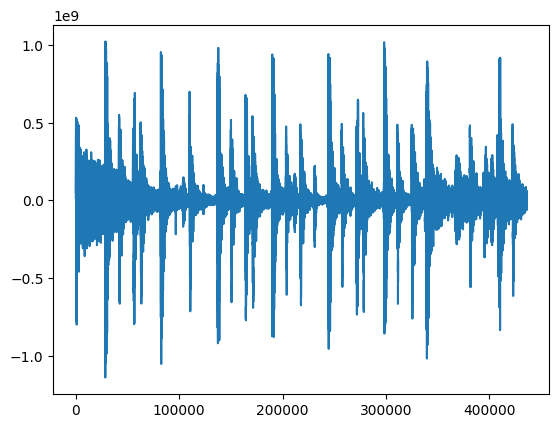

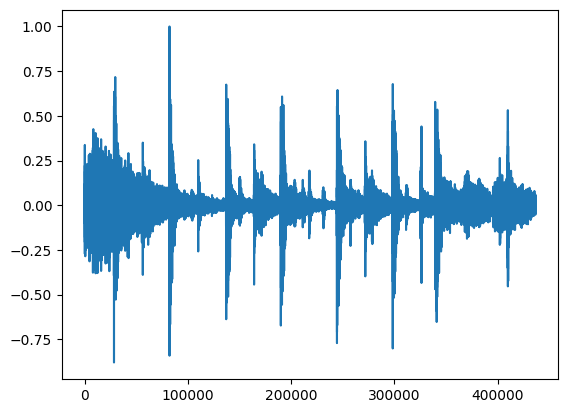

In [8]:
filtered_drums = signal.lfilter(b_dig, a_dig, drums);

filtered_drums /= np.max(np.abs(filtered_drums));

plt.plot(drums);
plt.show();
plt.plot(filtered_drums);
plt.show();

In [9]:
Audio(filtered_drums, rate=fs)

# 2. Aufgabe
Gegeben ist das folgende Toleranzschema für die Dämpfung eines Tiefpassfilters. 

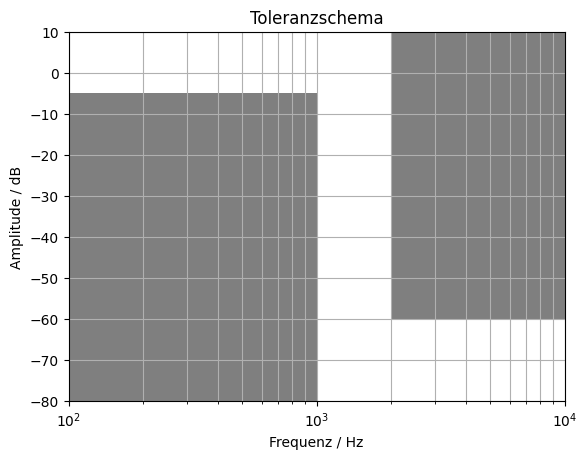

In [10]:
wp = 1000   # Durchlassfrequenz in Hz
ws = 2000   # Sperrfrequenz in Hz
gpass = 5   # Dämpfung im Durchlassbereich in dB
gstop = 60  # Dämpfung im Sperrbereich

plt.semilogx()
plt.grid(which='both', axis='both')

rpass = patches.Rectangle((wp, -gpass), -1000, -1000, facecolor="black", alpha=0.5)
rstop = patches.Rectangle((ws, -gstop), 40000,   100, facecolor="black", alpha=0.5)
ax: plt.Axes = plt.gca()
ax.add_patch(rpass)
ax.add_patch(rstop)

plt.xlim(100, 10e3)
plt.ylim(-80, 10)
plt.title("Toleranzschema")
plt.xlabel("Frequenz / Hz")
plt.ylabel("Amplitude / dB")
plt.show()

a) Legen Sie einen Butterworth-Filter und einen Cebysev-Filter aus, die das geforderte Toleranzschema erfüllen! 
Stellen Sie den Amplitudengang der beiden Filter im Toleranzschema dar!

Hinweis: Hierfür eignet sich die Funktion [```signal.iirdesign```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirdesign.html#scipy.signal.iirdesign)


In [11]:
#Abtastfrequenz
fa = 1e4 #[Hz]

In [12]:
butterworth_b, butterworth_a = signal.iirdesign(wp, ws, gpass, gstop, ftype="butter", fs=fa);
chebysev_b,    chebysev_a    = signal.iirdesign(wp, ws, gpass, gstop, ftype="cheby1", fs=fa);

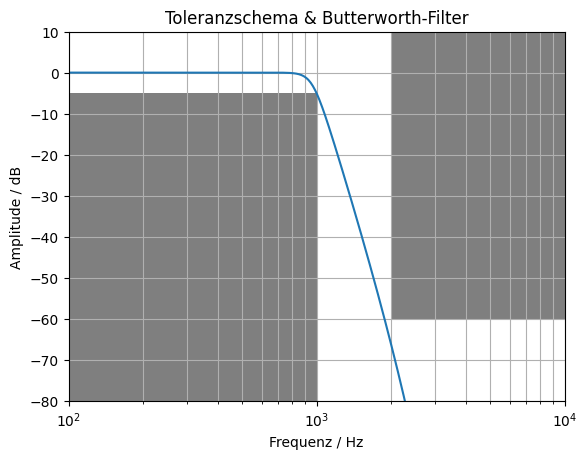

In [13]:
w_z, h_z = signal.freqz(butterworth_b, butterworth_a, fs=2 * np.pi * fa);

w_z /= 2 * np.pi;

plt.close();

plt.semilogx()
plt.grid(which='both', axis='both')

rpass = patches.Rectangle((wp, -gpass), -1000, -1000, facecolor="black", alpha=0.5)
rstop = patches.Rectangle((ws, -gstop), 40000,   100, facecolor="black", alpha=0.5)
ax: plt.Axes = plt.gca()
ax.add_patch(rpass)
ax.add_patch(rstop)

plt.plot(w_z, 20 * np.log10(np.abs(h_z)));

plt.xlim(100, 10e3)
plt.ylim(-80, 10)
plt.title("Toleranzschema & Butterworth-Filter")
plt.xlabel("Frequenz / Hz")
plt.ylabel("Amplitude / dB")
plt.show()

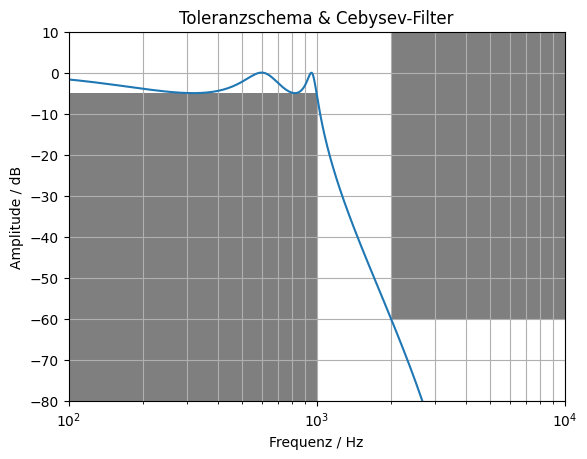

In [14]:
w_z, h_z = signal.freqz(chebysev_b, chebysev_a, fs=2 * np.pi * fa);

w_z /= 2 * np.pi;

plt.close();

plt.semilogx()
plt.grid(which='both', axis='both')

rpass = patches.Rectangle((wp, -gpass), -1000, -1000, facecolor="black", alpha=0.5)
rstop = patches.Rectangle((ws, -gstop), 40000,   100, facecolor="black", alpha=0.5)
ax: plt.Axes = plt.gca()
ax.add_patch(rpass)
ax.add_patch(rstop)

plt.plot(w_z, 20 * np.log10(np.abs(h_z)));

plt.xlim(100, 10e3)
plt.ylim(-80, 10)
plt.title("Toleranzschema & Cebysev-Filter")
plt.xlabel("Frequenz / Hz")
plt.ylabel("Amplitude / dB")
plt.show()

b) Gegeben ist das folgende Impulssignal mit einer Samplerate von 10 kHz. Wenden Sie den Butterworth-Filter aus Aufgabenteil a) auf das Impulssignal an. Verwenden Sie hierfür einmal die Funktion [```signal.lfilter```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html#scipy.signal.lfilter) und einmal die Funktion [```signal.filtfilt```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.filtfilt.html#scipy.signal.filtfilt). Stellen Sie die beiden gefilterten Signale in einem Diagramm dar und diskutieren Sie die Unterschiede.

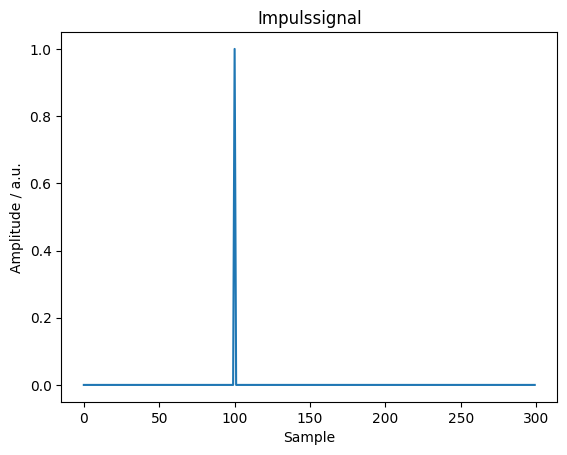

In [15]:
sig = signal.unit_impulse(300, 100)
plt.plot(sig)
plt.title("Impulssignal")
plt.ylabel("Amplitude / a.u.")
plt.xlabel("Sample")
plt.show()

In [16]:
sig_lfilter     = signal.lfilter(butterworth_b, butterworth_a, sig);
sig_filtfilt    = signal.filtfilt(butterworth_b, butterworth_a, sig);

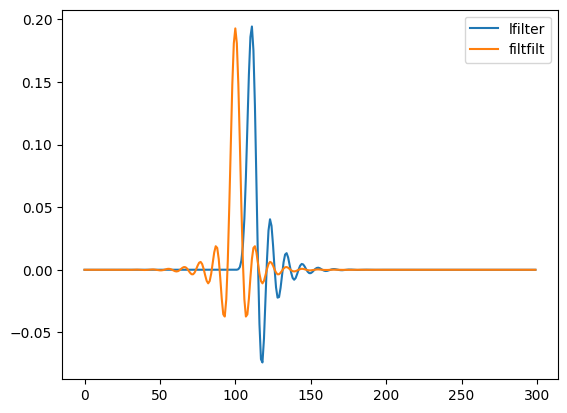

In [18]:
plt.close();

plt.plot(sig_lfilter, label="lfilter");
plt.plot(sig_filtfilt, label="filtfilt");

plt.legend();
plt.show();

Man sieht, dass das Signal, welches über `signal.lfilter` mit Butterworth gefiltert wurde ein zeitliches Delay hat. Dies geschieht daher, da `signal.filtfilt` im Gegensatz zu `signal.lfilter` den Filter "zweimal, einmal vorwärts und einemal rückwärts" anwendet, wodurch der Phasenversatz verschwindet.